In [400]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score
import copy, math

In [401]:
data = pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv')

In [402]:
data.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [403]:
data.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

encode

In [404]:
le = LabelEncoder()
data['name_encoder'] = le.fit_transform(data['name'])

data['fuel_encode'] = le.fit_transform(data['fuel'])
data['seller_type_encode'] = le.fit_transform(data['seller_type'])
data['transmission__encode'] = le.fit_transform(data['transmission'])
data['seller_type_encode'] = le.fit_transform(data['seller_type'])
data['owner_encode'] = le.fit_transform(data['owner'])
data['name_encoder'] = le.fit_transform(data['name'])


data = data[:400]

In [405]:
data['name_encoder'].value_counts()
data.drop(['seller_type','owner', 'fuel','name','transmission'], axis = 1)

data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,name_encoder,fuel_encode,seller_type_encode,transmission__encode,owner_encode
0,Ambassador CLASSIC 1500 DSL AC,2005,120000,50000,Diesel,Individual,Manual,Second Owner,0,1,1,1,2
1,Ambassador CLASSIC 1500 DSL AC,2005,120000,50000,Diesel,Individual,Manual,Second Owner,0,1,1,1,2
2,Ambassador Classic 2000 Dsz,2002,50000,120000,Diesel,Individual,Manual,Fourth & Above Owner,1,1,1,1,1
3,Ambassador Grand 1800 ISZ MPFI PW CL,2012,430000,50000,Petrol,Individual,Manual,Second Owner,2,4,1,1,2
4,Audi A4 1.8 TFSI,2012,1200000,60000,Petrol,Individual,Automatic,Third Owner,3,4,1,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,Ford EcoSport 1.5 Diesel Titanium Plus BSIV,2018,930000,20000,Diesel,Individual,Manual,First Owner,155,1,1,1,0
396,Ford EcoSport 1.5 Diesel Titanium Plus BSIV,2018,930000,20000,Diesel,Individual,Manual,First Owner,155,1,1,1,0
397,Ford EcoSport 1.5 Diesel Titanium Plus BSIV,2017,930000,12000,Diesel,Individual,Manual,First Owner,155,1,1,1,0
398,Ford EcoSport 1.5 Diesel Titanium Plus BSIV,2014,550000,79800,Diesel,Dealer,Manual,First Owner,155,1,0,1,0


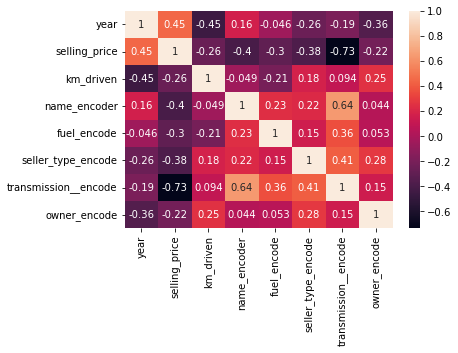

In [406]:
    plt.figure()
    sns.heatmap(data.corr(), annot=True)

    plt.show()

In [407]:
y = data['selling_price']
x = data.drop(['seller_type','owner', 'fuel','name','transmission'], axis = 1)

X_features = data.columns
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.4, random_state=42)

x

,year,selling_price,km_driven,name_encoder,fuel_encode,seller_type_encode,transmission__encode,owner_encode
0,2005,120000,50000,0,1,1,1,2
1,2005,120000,50000,0,1,1,1,2
2,2002,50000,120000,1,1,1,1,1
3,2012,430000,50000,2,4,1,1,2
4,2012,1200000,60000,3,4,1,0,4
...,...,...,...,...,...,...,...,...
395,2018,930000,20000,155,1,1,1,0
396,2018,930000,20000,155,1,1,1,0
397,2017,930000,12000,155,1,1,1,0
398,2014,550000,79800,155,1,0,1,0


In [408]:
x_train = np.array(x_train)
y_train = np.array(y_train)

x_test = np.array(x_test)
x_test = x_test.reshape(-1, 8)
y_test = np.array(y_test)
y_test = y_test.reshape(-1, 1)


scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

x_test = scaler.fit_transform(x_test)

type(x_test)

lr = LinearRegression()
lr.fit(x_train, y_train)

# print(r2_score(y_test, lr.predict(y_test)))

LinearRegression()

Text(0.5, 0.98, 'target versus prediction model')

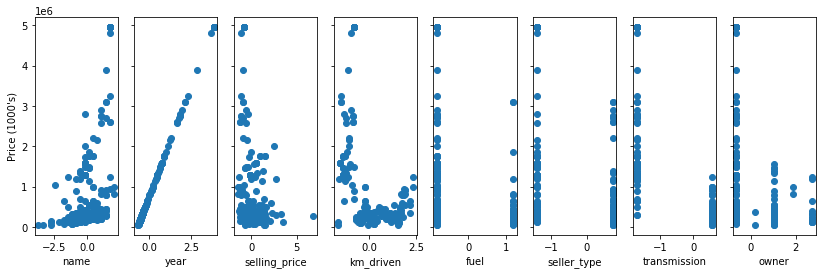

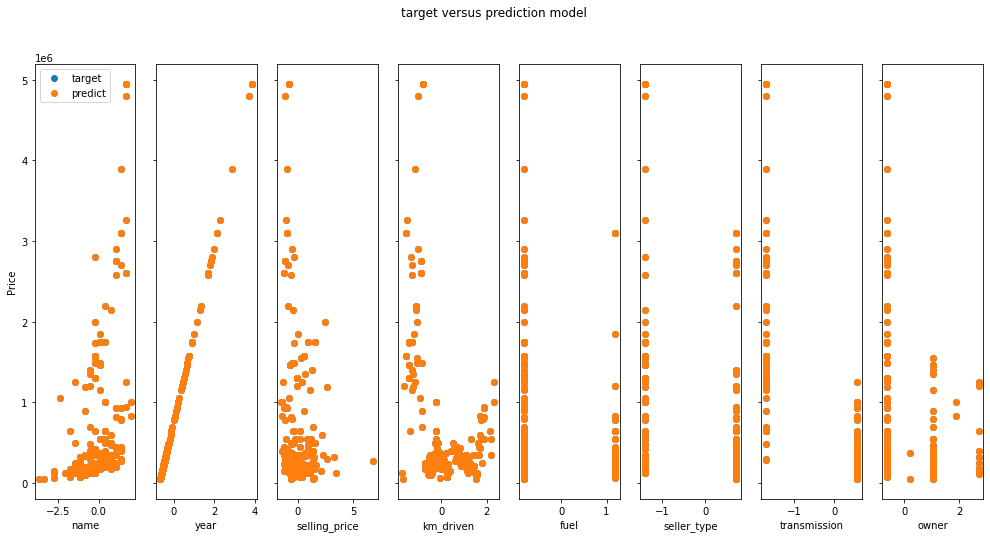

In [409]:
fig,ax=plt.subplots(1, 8, figsize=(14, 4), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(x_train[:,i],y_train)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("Price (1000's)")
# plt.show()
fig,ax=plt.subplots(1,8,figsize=(17,8),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(x_train[:,i],y_train, label = 'target')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(x_train[:,i],lr.predict(x_train), label = 'predict')
ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle("target versus prediction model")

In [410]:





y_pred = lr.predict(x_test)
print(r2_score(y_test, y_pred))
print("MAE: ", (metrics.mean_absolute_error(y_pred, y_test)))
print("MSE: ", (metrics.mean_squared_error(y_pred, y_test)))

print(lr.coef_)
lr.intercept_

0.979549689581899
MAE:  87997.89911832272
MSE:  31869031412.458538
[ 5.12903069e-11  1.08291565e+06 -1.94000012e-10  2.14728630e-11
 -1.46610814e-10 -1.36496325e-10 -1.56867581e-10 -3.29190583e-10]


775182.0333333333

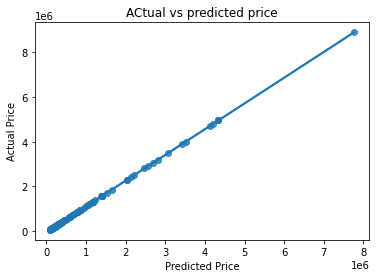

In [411]:
sns.regplot(x=y_pred, y=y_test)
plt.xlabel("Predicted Price")
plt.ylabel('Actual Price')
plt.title("ACtual vs predicted price")
plt.show()

manual

In [412]:
b_init = 785.1811367994083
w_init = np.array([ 0, 0, 0, 0, 0, 0, 0, 0])

In [413]:
def predict(x, w, b): 
    """
    single predict using linear regression
    Args:
      x (ndarray): Shape (n,) example with multiple features
      w (ndarray): Shape (n,) model parameters   
      b (scalar):             model parameter 
      
    Returns:
      p (scalar):  prediction
    """
    p = np.dot(x, w) + b     
    return p    

In [414]:
# get a row from our training data
x_vec = x_train[0,:]
print(f"x_vec shape {x_vec.shape}, x_vec value: {x_vec}")

# make a prediction
f_wb = predict(x_vec,w_init, b_init)
print(f"f_wb shape {f_wb.shape}, prediction: {f_wb}")

x_vec shape (8,), x_vec value: [-0.21687139 -0.4849704  -0.6314865   1.80085097 -0.83793058  0.71374643
  0.58376547 -0.63527724]
f_wb shape (), prediction: 785.1811367994083


In [415]:
def compute_cost(X, y, w, b): 
    """
    compute cost
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      cost (scalar): cost
    """
    m = X.shape[0]
    cost = 0.0
    for i in range(m):                                
        f_wb_i = np.dot(X[i], w) + b           #(n,)(n,) = scalar (see np.dot)
        cost = cost + (f_wb_i - y[i])**2       #scalar
    cost = cost / (2 * m)                      #scalar    
    return cost

In [416]:
cost = compute_cost(x_train, y_train, w_init, b_init)
print(f'Cost at optimal w : {cost}')

Cost at optimal w : 886198392054.6914


In [417]:
def compute_gradient(X, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar):       The gradient of the cost w.r.t. the parameter b. 
    """
    m,n = X.shape           #(number of examples, number of features)
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):                             
        err = (np.dot(X[i], w) + b) - y[i]   
#         if i < 17 :
#             print(X, y, w, b)
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err * X[i, j]    
#             print(dj_dw, j)
        dj_db = dj_db + err                  
        
    dj_dw = dj_dw / m                                
    dj_db = dj_db / m                                
        
    return dj_db, dj_dw

In [418]:
#Compute and display gradient 
tmp_dj_db, tmp_dj_dw = compute_gradient(x_train, y_train, w_init, b_init)
print(f'dj_db at initial w,b: {tmp_dj_db}')
print(f'dj_dw at initial w,b: \n {tmp_dj_dw}')

dj_db at initial w,b: -774396.8521965358
dj_dw at initial w,b: 
 [ -504582.25421447 -1082915.64741557   231663.73620859   458795.1202751
   365916.10288725   461196.98464356   817787.43712755   239132.15864357]


In [419]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    """
    Performs batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      X (ndarray (m,n))   : Data, m examples with n features
      y (ndarray (m,))    : target values
      w_in (ndarray (n,)) : initial model parameters  
      b_in (scalar)       : initial model parameter
      cost_function       : function to compute cost
      gradient_function   : function to compute the gradient
      alpha (float)       : Learning rate
      num_iters (int)     : number of iterations to run gradient descent
      
    Returns:
      w (ndarray (n,)) : Updated values of parameters 
      b (scalar)       : Updated value of parameter 
      """
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db,dj_dw = gradient_function(X, y, w, b)   ##None
#         if i < 17 :
#             print("d_dw ", dj_dw)
        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               ##None
        b = b - alpha * dj_db               ##None
      
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(X, y, w, b))

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i %  100000:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")
        
    return w, b, J_history #return final w,b and J history for graphing

In [434]:
# initialize parameters
initial_w = [ 1.21861083e-10,  5.77641741e+05, -6.22807143e-11, -1.31755018e-10, 2.21483952e-10,  1.56660670e-11, -2.20711390e-10, -5.29242495e-11]

initial_b = 0
# some gradient descent settings
iterations = 7777
alpha = 288888.0e-7
# run gradient descent 
w_final, b_final, J_hist = gradient_descent(x_train, y_train, initial_w, initial_b,
                                                    compute_cost, compute_gradient, 
                                                    alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m,_ = x_test.shape
for i in range(m):
    print(f"prediction: {np.dot(x_test[i], w_final) + b_final:0.2f}, target value: {y_test[i]}")

Iteration    1: Cost 364097316321.35   
Iteration    2: Cost 336973101638.39   
Iteration    3: Cost 312545232827.26   
Iteration    4: Cost 290472587910.33   
Iteration    5: Cost 270463735481.59   
Iteration    6: Cost 252269228007.08   
Iteration    7: Cost 235675119702.41   
Iteration    8: Cost 220497512677.61   
Iteration    9: Cost 206577966609.55   
Iteration   10: Cost 193779633688.50   
Iteration   11: Cost 181984002808.79   
Iteration   12: Cost 171088155619.09   
Iteration   13: Cost 161002452692.68   
Iteration   14: Cost 151648581204.87   
Iteration   15: Cost 142957906519.32   
Iteration   16: Cost 134870079327.58   
Iteration   17: Cost 127331857741.42   
Iteration   18: Cost 120296110245.97   
Iteration   19: Cost 113720970883.10   
Iteration   20: Cost 107569122618.07   
Iteration   21: Cost 101807188689.04   
Iteration   22: Cost 96405214967.80   
Iteration   23: Cost 91336229070.06   
Iteration   24: Cost 86575864228.13   
Iteration   25: Cost 82102037848.84   
Iter

Iteration  263: Cost 698442154.18   
Iteration  264: Cost 690600637.30   
Iteration  265: Cost 682849590.55   
Iteration  266: Cost 675187921.31   
Iteration  267: Cost 667614551.40   
Iteration  268: Cost 660128416.75   
Iteration  269: Cost 652728467.29   
Iteration  270: Cost 645413666.63   
Iteration  271: Cost 638182991.93   
Iteration  272: Cost 631035433.64   
Iteration  273: Cost 623969995.30   
Iteration  274: Cost 616985693.37   
Iteration  275: Cost 610081556.99   
Iteration  276: Cost 603256627.84   
Iteration  277: Cost 596509959.91   
Iteration  278: Cost 589840619.32   
Iteration  279: Cost 583247684.18   
Iteration  280: Cost 576730244.35   
Iteration  281: Cost 570287401.31   
Iteration  282: Cost 563918268.01   
Iteration  283: Cost 557621968.63   
Iteration  284: Cost 551397638.49   
Iteration  285: Cost 545244423.85   
Iteration  286: Cost 539161481.77   
Iteration  287: Cost 533147979.92   
Iteration  288: Cost 527203096.51   
Iteration  289: Cost 521326020.03   
I

Iteration  534: Cost 35322236.86   
Iteration  535: Cost 34941016.47   
Iteration  536: Cost 34563932.38   
Iteration  537: Cost 34190939.35   
Iteration  538: Cost 33821992.64   
Iteration  539: Cost 33457047.99   
Iteration  540: Cost 33096061.66   
Iteration  541: Cost 32738990.37   
Iteration  542: Cost 32385791.31   
Iteration  543: Cost 32036422.18   
Iteration  544: Cost 31690841.12   
Iteration  545: Cost 31349006.73   
Iteration  546: Cost 31010878.08   
Iteration  547: Cost 30676414.70   
Iteration  548: Cost 30345576.55   
Iteration  549: Cost 30018324.03   
Iteration  550: Cost 29694618.00   
Iteration  551: Cost 29374419.73   
Iteration  552: Cost 29057690.93   
Iteration  553: Cost 28744393.72   
Iteration  554: Cost 28434490.66   
Iteration  555: Cost 28127944.70   
Iteration  556: Cost 27824719.21   
Iteration  557: Cost 27524777.97   
Iteration  558: Cost 27228085.14   
Iteration  559: Cost 26934605.30   
Iteration  560: Cost 26644303.40   
Iteration  561: Cost 2635714

Iteration  808: Cost 1833130.70   
Iteration  809: Cost 1813501.64   
Iteration  810: Cost 1794082.98   
Iteration  811: Cost 1774872.47   
Iteration  812: Cost 1755867.88   
Iteration  813: Cost 1737066.98   
Iteration  814: Cost 1718467.60   
Iteration  815: Cost 1700067.57   
Iteration  816: Cost 1681864.75   
Iteration  817: Cost 1663857.02   
Iteration  818: Cost 1646042.30   
Iteration  819: Cost 1628418.50   
Iteration  820: Cost 1610983.58   
Iteration  821: Cost 1593735.52   
Iteration  822: Cost 1576672.30   
Iteration  823: Cost 1559791.94   
Iteration  824: Cost 1543092.48   
Iteration  825: Cost 1526571.98   
Iteration  826: Cost 1510228.52   
Iteration  827: Cost 1494060.19   
Iteration  828: Cost 1478065.12   
Iteration  829: Cost 1462241.45   
Iteration  830: Cost 1446587.34   
Iteration  831: Cost 1431100.97   
Iteration  832: Cost 1415780.54   
Iteration  833: Cost 1400624.27   
Iteration  834: Cost 1385630.39   
Iteration  835: Cost 1370797.17   
Iteration  836: Cost

Iteration 1080: Cost 98327.48   
Iteration 1081: Cost 97276.18   
Iteration 1082: Cost 96236.12   
Iteration 1083: Cost 95207.18   
Iteration 1084: Cost 94189.25   
Iteration 1085: Cost 93182.20   
Iteration 1086: Cost 92185.92   
Iteration 1087: Cost 91200.30   
Iteration 1088: Cost 90225.21   
Iteration 1089: Cost 89260.55   
Iteration 1090: Cost 88306.21   
Iteration 1091: Cost 87362.08   
Iteration 1092: Cost 86428.04   
Iteration 1093: Cost 85503.98   
Iteration 1094: Cost 84589.81   
Iteration 1095: Cost 83685.42   
Iteration 1096: Cost 82790.70   
Iteration 1097: Cost 81905.54   
Iteration 1098: Cost 81029.85   
Iteration 1099: Cost 80163.52   
Iteration 1100: Cost 79306.46   
Iteration 1101: Cost 78458.56   
Iteration 1102: Cost 77619.73   
Iteration 1103: Cost 76789.87   
Iteration 1104: Cost 75968.88   
Iteration 1105: Cost 75156.68   
Iteration 1106: Cost 74353.15   
Iteration 1107: Cost 73558.22   
Iteration 1108: Cost 72771.79   
Iteration 1109: Cost 71993.77   
Iteration 

Iteration 1352: Cost  5285.65   
Iteration 1353: Cost  5229.16   
Iteration 1354: Cost  5173.26   
Iteration 1355: Cost  5117.97   
Iteration 1356: Cost  5063.26   
Iteration 1357: Cost  5009.14   
Iteration 1358: Cost  4955.60   
Iteration 1359: Cost  4902.63   
Iteration 1360: Cost  4850.23   
Iteration 1361: Cost  4798.39   
Iteration 1362: Cost  4747.10   
Iteration 1363: Cost  4696.36   
Iteration 1364: Cost  4646.16   
Iteration 1365: Cost  4596.50   
Iteration 1366: Cost  4547.37   
Iteration 1367: Cost  4498.76   
Iteration 1368: Cost  4450.68   
Iteration 1369: Cost  4403.10   
Iteration 1370: Cost  4356.04   
Iteration 1371: Cost  4309.48   
Iteration 1372: Cost  4263.42   
Iteration 1373: Cost  4217.85   
Iteration 1374: Cost  4172.76   
Iteration 1375: Cost  4128.16   
Iteration 1376: Cost  4084.04   
Iteration 1377: Cost  4040.39   
Iteration 1378: Cost  3997.20   
Iteration 1379: Cost  3954.47   
Iteration 1380: Cost  3912.21   
Iteration 1381: Cost  3870.39   
Iteration 

Iteration 1626: Cost   278.21   
Iteration 1627: Cost   275.23   
Iteration 1628: Cost   272.29   
Iteration 1629: Cost   269.38   
Iteration 1630: Cost   266.50   
Iteration 1631: Cost   263.65   
Iteration 1632: Cost   260.84   
Iteration 1633: Cost   258.05   
Iteration 1634: Cost   255.29   
Iteration 1635: Cost   252.56   
Iteration 1636: Cost   249.86   
Iteration 1637: Cost   247.19   
Iteration 1638: Cost   244.55   
Iteration 1639: Cost   241.94   
Iteration 1640: Cost   239.35   
Iteration 1641: Cost   236.79   
Iteration 1642: Cost   234.26   
Iteration 1643: Cost   231.76   
Iteration 1644: Cost   229.28   
Iteration 1645: Cost   226.83   
Iteration 1646: Cost   224.40   
Iteration 1647: Cost   222.01   
Iteration 1648: Cost   219.63   
Iteration 1649: Cost   217.29   
Iteration 1650: Cost   214.96   
Iteration 1651: Cost   212.67   
Iteration 1652: Cost   210.39   
Iteration 1653: Cost   208.14   
Iteration 1654: Cost   205.92   
Iteration 1655: Cost   203.72   
Iteration 

Iteration 1896: Cost    15.29   
Iteration 1897: Cost    15.12   
Iteration 1898: Cost    14.96   
Iteration 1899: Cost    14.80   
Iteration 1900: Cost    14.64   
Iteration 1901: Cost    14.49   
Iteration 1902: Cost    14.33   
Iteration 1903: Cost    14.18   
Iteration 1904: Cost    14.03   
Iteration 1905: Cost    13.88   
Iteration 1906: Cost    13.73   
Iteration 1907: Cost    13.58   
Iteration 1908: Cost    13.44   
Iteration 1909: Cost    13.29   
Iteration 1910: Cost    13.15   
Iteration 1911: Cost    13.01   
Iteration 1912: Cost    12.87   
Iteration 1913: Cost    12.74   
Iteration 1914: Cost    12.60   
Iteration 1915: Cost    12.46   
Iteration 1916: Cost    12.33   
Iteration 1917: Cost    12.20   
Iteration 1918: Cost    12.07   
Iteration 1919: Cost    11.94   
Iteration 1920: Cost    11.81   
Iteration 1921: Cost    11.69   
Iteration 1922: Cost    11.56   
Iteration 1923: Cost    11.44   
Iteration 1924: Cost    11.32   
Iteration 1925: Cost    11.19   
Iteration 

Iteration 2167: Cost     0.83   
Iteration 2168: Cost     0.82   
Iteration 2169: Cost     0.81   
Iteration 2170: Cost     0.80   
Iteration 2171: Cost     0.80   
Iteration 2172: Cost     0.79   
Iteration 2173: Cost     0.78   
Iteration 2174: Cost     0.77   
Iteration 2175: Cost     0.76   
Iteration 2176: Cost     0.75   
Iteration 2177: Cost     0.75   
Iteration 2178: Cost     0.74   
Iteration 2179: Cost     0.73   
Iteration 2180: Cost     0.72   
Iteration 2181: Cost     0.72   
Iteration 2182: Cost     0.71   
Iteration 2183: Cost     0.70   
Iteration 2184: Cost     0.69   
Iteration 2185: Cost     0.68   
Iteration 2186: Cost     0.68   
Iteration 2187: Cost     0.67   
Iteration 2188: Cost     0.66   
Iteration 2189: Cost     0.66   
Iteration 2190: Cost     0.65   
Iteration 2191: Cost     0.64   
Iteration 2192: Cost     0.64   
Iteration 2193: Cost     0.63   
Iteration 2194: Cost     0.62   
Iteration 2195: Cost     0.62   
Iteration 2196: Cost     0.61   
Iteration 

Iteration 2485: Cost     0.03   
Iteration 2486: Cost     0.03   
Iteration 2487: Cost     0.03   
Iteration 2488: Cost     0.03   
Iteration 2489: Cost     0.03   
Iteration 2490: Cost     0.03   
Iteration 2491: Cost     0.03   
Iteration 2492: Cost     0.03   
Iteration 2493: Cost     0.03   
Iteration 2494: Cost     0.02   
Iteration 2495: Cost     0.02   
Iteration 2496: Cost     0.02   
Iteration 2497: Cost     0.02   
Iteration 2498: Cost     0.02   
Iteration 2499: Cost     0.02   
Iteration 2500: Cost     0.02   
Iteration 2501: Cost     0.02   
Iteration 2502: Cost     0.02   
Iteration 2503: Cost     0.02   
Iteration 2504: Cost     0.02   
Iteration 2505: Cost     0.02   
Iteration 2506: Cost     0.02   
Iteration 2507: Cost     0.02   
Iteration 2508: Cost     0.02   
Iteration 2509: Cost     0.02   
Iteration 2510: Cost     0.02   
Iteration 2511: Cost     0.02   
Iteration 2512: Cost     0.02   
Iteration 2513: Cost     0.02   
Iteration 2514: Cost     0.02   
Iteration 

Iteration 2789: Cost     0.00   
Iteration 2790: Cost     0.00   
Iteration 2791: Cost     0.00   
Iteration 2792: Cost     0.00   
Iteration 2793: Cost     0.00   
Iteration 2794: Cost     0.00   
Iteration 2795: Cost     0.00   
Iteration 2796: Cost     0.00   
Iteration 2797: Cost     0.00   
Iteration 2798: Cost     0.00   
Iteration 2799: Cost     0.00   
Iteration 2800: Cost     0.00   
Iteration 2801: Cost     0.00   
Iteration 2802: Cost     0.00   
Iteration 2803: Cost     0.00   
Iteration 2804: Cost     0.00   
Iteration 2805: Cost     0.00   
Iteration 2806: Cost     0.00   
Iteration 2807: Cost     0.00   
Iteration 2808: Cost     0.00   
Iteration 2809: Cost     0.00   
Iteration 2810: Cost     0.00   
Iteration 2811: Cost     0.00   
Iteration 2812: Cost     0.00   
Iteration 2813: Cost     0.00   
Iteration 2814: Cost     0.00   
Iteration 2815: Cost     0.00   
Iteration 2816: Cost     0.00   
Iteration 2817: Cost     0.00   
Iteration 2818: Cost     0.00   
Iteration 

Iteration 3066: Cost     0.00   
Iteration 3067: Cost     0.00   
Iteration 3068: Cost     0.00   
Iteration 3069: Cost     0.00   
Iteration 3070: Cost     0.00   
Iteration 3071: Cost     0.00   
Iteration 3072: Cost     0.00   
Iteration 3073: Cost     0.00   
Iteration 3074: Cost     0.00   
Iteration 3075: Cost     0.00   
Iteration 3076: Cost     0.00   
Iteration 3077: Cost     0.00   
Iteration 3078: Cost     0.00   
Iteration 3079: Cost     0.00   
Iteration 3080: Cost     0.00   
Iteration 3081: Cost     0.00   
Iteration 3082: Cost     0.00   
Iteration 3083: Cost     0.00   
Iteration 3084: Cost     0.00   
Iteration 3085: Cost     0.00   
Iteration 3086: Cost     0.00   
Iteration 3087: Cost     0.00   
Iteration 3088: Cost     0.00   
Iteration 3089: Cost     0.00   
Iteration 3090: Cost     0.00   
Iteration 3091: Cost     0.00   
Iteration 3092: Cost     0.00   
Iteration 3093: Cost     0.00   
Iteration 3094: Cost     0.00   
Iteration 3095: Cost     0.00   
Iteration 

Iteration 3340: Cost     0.00   
Iteration 3341: Cost     0.00   
Iteration 3342: Cost     0.00   
Iteration 3343: Cost     0.00   
Iteration 3344: Cost     0.00   
Iteration 3345: Cost     0.00   
Iteration 3346: Cost     0.00   
Iteration 3347: Cost     0.00   
Iteration 3348: Cost     0.00   
Iteration 3349: Cost     0.00   
Iteration 3350: Cost     0.00   
Iteration 3351: Cost     0.00   
Iteration 3352: Cost     0.00   
Iteration 3353: Cost     0.00   
Iteration 3354: Cost     0.00   
Iteration 3355: Cost     0.00   
Iteration 3356: Cost     0.00   
Iteration 3357: Cost     0.00   
Iteration 3358: Cost     0.00   
Iteration 3359: Cost     0.00   
Iteration 3360: Cost     0.00   
Iteration 3361: Cost     0.00   
Iteration 3362: Cost     0.00   
Iteration 3363: Cost     0.00   
Iteration 3364: Cost     0.00   
Iteration 3365: Cost     0.00   
Iteration 3366: Cost     0.00   
Iteration 3367: Cost     0.00   
Iteration 3368: Cost     0.00   
Iteration 3369: Cost     0.00   
Iteration 

Iteration 3610: Cost     0.00   
Iteration 3611: Cost     0.00   
Iteration 3612: Cost     0.00   
Iteration 3613: Cost     0.00   
Iteration 3614: Cost     0.00   
Iteration 3615: Cost     0.00   
Iteration 3616: Cost     0.00   
Iteration 3617: Cost     0.00   
Iteration 3618: Cost     0.00   
Iteration 3619: Cost     0.00   
Iteration 3620: Cost     0.00   
Iteration 3621: Cost     0.00   
Iteration 3622: Cost     0.00   
Iteration 3623: Cost     0.00   
Iteration 3624: Cost     0.00   
Iteration 3625: Cost     0.00   
Iteration 3626: Cost     0.00   
Iteration 3627: Cost     0.00   
Iteration 3628: Cost     0.00   
Iteration 3629: Cost     0.00   
Iteration 3630: Cost     0.00   
Iteration 3631: Cost     0.00   
Iteration 3632: Cost     0.00   
Iteration 3633: Cost     0.00   
Iteration 3634: Cost     0.00   
Iteration 3635: Cost     0.00   
Iteration 3636: Cost     0.00   
Iteration 3637: Cost     0.00   
Iteration 3638: Cost     0.00   
Iteration 3639: Cost     0.00   
Iteration 

Iteration 3873: Cost     0.00   
Iteration 3874: Cost     0.00   
Iteration 3875: Cost     0.00   
Iteration 3876: Cost     0.00   
Iteration 3877: Cost     0.00   
Iteration 3878: Cost     0.00   
Iteration 3879: Cost     0.00   
Iteration 3880: Cost     0.00   
Iteration 3881: Cost     0.00   
Iteration 3882: Cost     0.00   
Iteration 3883: Cost     0.00   
Iteration 3884: Cost     0.00   
Iteration 3885: Cost     0.00   
Iteration 3886: Cost     0.00   
Iteration 3887: Cost     0.00   
Iteration 3888: Cost     0.00   
Iteration 3889: Cost     0.00   
Iteration 3890: Cost     0.00   
Iteration 3891: Cost     0.00   
Iteration 3892: Cost     0.00   
Iteration 3893: Cost     0.00   
Iteration 3894: Cost     0.00   
Iteration 3895: Cost     0.00   
Iteration 3896: Cost     0.00   
Iteration 3897: Cost     0.00   
Iteration 3898: Cost     0.00   
Iteration 3899: Cost     0.00   
Iteration 3900: Cost     0.00   
Iteration 3901: Cost     0.00   
Iteration 3902: Cost     0.00   
Iteration 

Iteration 4146: Cost     0.00   
Iteration 4147: Cost     0.00   
Iteration 4148: Cost     0.00   
Iteration 4149: Cost     0.00   
Iteration 4150: Cost     0.00   
Iteration 4151: Cost     0.00   
Iteration 4152: Cost     0.00   
Iteration 4153: Cost     0.00   
Iteration 4154: Cost     0.00   
Iteration 4155: Cost     0.00   
Iteration 4156: Cost     0.00   
Iteration 4157: Cost     0.00   
Iteration 4158: Cost     0.00   
Iteration 4159: Cost     0.00   
Iteration 4160: Cost     0.00   
Iteration 4161: Cost     0.00   
Iteration 4162: Cost     0.00   
Iteration 4163: Cost     0.00   
Iteration 4164: Cost     0.00   
Iteration 4165: Cost     0.00   
Iteration 4166: Cost     0.00   
Iteration 4167: Cost     0.00   
Iteration 4168: Cost     0.00   
Iteration 4169: Cost     0.00   
Iteration 4170: Cost     0.00   
Iteration 4171: Cost     0.00   
Iteration 4172: Cost     0.00   
Iteration 4173: Cost     0.00   
Iteration 4174: Cost     0.00   
Iteration 4175: Cost     0.00   
Iteration 

Iteration 4419: Cost     0.00   
Iteration 4420: Cost     0.00   
Iteration 4421: Cost     0.00   
Iteration 4422: Cost     0.00   
Iteration 4423: Cost     0.00   
Iteration 4424: Cost     0.00   
Iteration 4425: Cost     0.00   
Iteration 4426: Cost     0.00   
Iteration 4427: Cost     0.00   
Iteration 4428: Cost     0.00   
Iteration 4429: Cost     0.00   
Iteration 4430: Cost     0.00   
Iteration 4431: Cost     0.00   
Iteration 4432: Cost     0.00   
Iteration 4433: Cost     0.00   
Iteration 4434: Cost     0.00   
Iteration 4435: Cost     0.00   
Iteration 4436: Cost     0.00   
Iteration 4437: Cost     0.00   
Iteration 4438: Cost     0.00   
Iteration 4439: Cost     0.00   
Iteration 4440: Cost     0.00   
Iteration 4441: Cost     0.00   
Iteration 4442: Cost     0.00   
Iteration 4443: Cost     0.00   
Iteration 4444: Cost     0.00   
Iteration 4445: Cost     0.00   
Iteration 4446: Cost     0.00   
Iteration 4447: Cost     0.00   
Iteration 4448: Cost     0.00   
Iteration 

Iteration 4692: Cost     0.00   
Iteration 4693: Cost     0.00   
Iteration 4694: Cost     0.00   
Iteration 4695: Cost     0.00   
Iteration 4696: Cost     0.00   
Iteration 4697: Cost     0.00   
Iteration 4698: Cost     0.00   
Iteration 4699: Cost     0.00   
Iteration 4700: Cost     0.00   
Iteration 4701: Cost     0.00   
Iteration 4702: Cost     0.00   
Iteration 4703: Cost     0.00   
Iteration 4704: Cost     0.00   
Iteration 4705: Cost     0.00   
Iteration 4706: Cost     0.00   
Iteration 4707: Cost     0.00   
Iteration 4708: Cost     0.00   
Iteration 4709: Cost     0.00   
Iteration 4710: Cost     0.00   
Iteration 4711: Cost     0.00   
Iteration 4712: Cost     0.00   
Iteration 4713: Cost     0.00   
Iteration 4714: Cost     0.00   
Iteration 4715: Cost     0.00   
Iteration 4716: Cost     0.00   
Iteration 4717: Cost     0.00   
Iteration 4718: Cost     0.00   
Iteration 4719: Cost     0.00   
Iteration 4720: Cost     0.00   
Iteration 4721: Cost     0.00   
Iteration 

Iteration 4962: Cost     0.00   
Iteration 4963: Cost     0.00   
Iteration 4964: Cost     0.00   
Iteration 4965: Cost     0.00   
Iteration 4966: Cost     0.00   
Iteration 4967: Cost     0.00   
Iteration 4968: Cost     0.00   
Iteration 4969: Cost     0.00   
Iteration 4970: Cost     0.00   
Iteration 4971: Cost     0.00   
Iteration 4972: Cost     0.00   
Iteration 4973: Cost     0.00   
Iteration 4974: Cost     0.00   
Iteration 4975: Cost     0.00   
Iteration 4976: Cost     0.00   
Iteration 4977: Cost     0.00   
Iteration 4978: Cost     0.00   
Iteration 4979: Cost     0.00   
Iteration 4980: Cost     0.00   
Iteration 4981: Cost     0.00   
Iteration 4982: Cost     0.00   
Iteration 4983: Cost     0.00   
Iteration 4984: Cost     0.00   
Iteration 4985: Cost     0.00   
Iteration 4986: Cost     0.00   
Iteration 4987: Cost     0.00   
Iteration 4988: Cost     0.00   
Iteration 4989: Cost     0.00   
Iteration 4990: Cost     0.00   
Iteration 4991: Cost     0.00   
Iteration 

Iteration 5234: Cost     0.00   
Iteration 5235: Cost     0.00   
Iteration 5236: Cost     0.00   
Iteration 5237: Cost     0.00   
Iteration 5238: Cost     0.00   
Iteration 5239: Cost     0.00   
Iteration 5240: Cost     0.00   
Iteration 5241: Cost     0.00   
Iteration 5242: Cost     0.00   
Iteration 5243: Cost     0.00   
Iteration 5244: Cost     0.00   
Iteration 5245: Cost     0.00   
Iteration 5246: Cost     0.00   
Iteration 5247: Cost     0.00   
Iteration 5248: Cost     0.00   
Iteration 5249: Cost     0.00   
Iteration 5250: Cost     0.00   
Iteration 5251: Cost     0.00   
Iteration 5252: Cost     0.00   
Iteration 5253: Cost     0.00   
Iteration 5254: Cost     0.00   
Iteration 5255: Cost     0.00   
Iteration 5256: Cost     0.00   
Iteration 5257: Cost     0.00   
Iteration 5258: Cost     0.00   
Iteration 5259: Cost     0.00   
Iteration 5260: Cost     0.00   
Iteration 5261: Cost     0.00   
Iteration 5262: Cost     0.00   
Iteration 5263: Cost     0.00   
Iteration 

Iteration 5499: Cost     0.00   
Iteration 5500: Cost     0.00   
Iteration 5501: Cost     0.00   
Iteration 5502: Cost     0.00   
Iteration 5503: Cost     0.00   
Iteration 5504: Cost     0.00   
Iteration 5505: Cost     0.00   
Iteration 5506: Cost     0.00   
Iteration 5507: Cost     0.00   
Iteration 5508: Cost     0.00   
Iteration 5509: Cost     0.00   
Iteration 5510: Cost     0.00   
Iteration 5511: Cost     0.00   
Iteration 5512: Cost     0.00   
Iteration 5513: Cost     0.00   
Iteration 5514: Cost     0.00   
Iteration 5515: Cost     0.00   
Iteration 5516: Cost     0.00   
Iteration 5517: Cost     0.00   
Iteration 5518: Cost     0.00   
Iteration 5519: Cost     0.00   
Iteration 5520: Cost     0.00   
Iteration 5521: Cost     0.00   
Iteration 5522: Cost     0.00   
Iteration 5523: Cost     0.00   
Iteration 5524: Cost     0.00   
Iteration 5525: Cost     0.00   
Iteration 5526: Cost     0.00   
Iteration 5527: Cost     0.00   
Iteration 5528: Cost     0.00   
Iteration 

Iteration 5763: Cost     0.00   
Iteration 5764: Cost     0.00   
Iteration 5765: Cost     0.00   
Iteration 5766: Cost     0.00   
Iteration 5767: Cost     0.00   
Iteration 5768: Cost     0.00   
Iteration 5769: Cost     0.00   
Iteration 5770: Cost     0.00   
Iteration 5771: Cost     0.00   
Iteration 5772: Cost     0.00   
Iteration 5773: Cost     0.00   
Iteration 5774: Cost     0.00   
Iteration 5775: Cost     0.00   
Iteration 5776: Cost     0.00   
Iteration 5777: Cost     0.00   
Iteration 5778: Cost     0.00   
Iteration 5779: Cost     0.00   
Iteration 5780: Cost     0.00   
Iteration 5781: Cost     0.00   
Iteration 5782: Cost     0.00   
Iteration 5783: Cost     0.00   
Iteration 5784: Cost     0.00   
Iteration 5785: Cost     0.00   
Iteration 5786: Cost     0.00   
Iteration 5787: Cost     0.00   
Iteration 5788: Cost     0.00   
Iteration 5789: Cost     0.00   
Iteration 5790: Cost     0.00   
Iteration 5791: Cost     0.00   
Iteration 5792: Cost     0.00   
Iteration 

Iteration 6026: Cost     0.00   
Iteration 6027: Cost     0.00   
Iteration 6028: Cost     0.00   
Iteration 6029: Cost     0.00   
Iteration 6030: Cost     0.00   
Iteration 6031: Cost     0.00   
Iteration 6032: Cost     0.00   
Iteration 6033: Cost     0.00   
Iteration 6034: Cost     0.00   
Iteration 6035: Cost     0.00   
Iteration 6036: Cost     0.00   
Iteration 6037: Cost     0.00   
Iteration 6038: Cost     0.00   
Iteration 6039: Cost     0.00   
Iteration 6040: Cost     0.00   
Iteration 6041: Cost     0.00   
Iteration 6042: Cost     0.00   
Iteration 6043: Cost     0.00   
Iteration 6044: Cost     0.00   
Iteration 6045: Cost     0.00   
Iteration 6046: Cost     0.00   
Iteration 6047: Cost     0.00   
Iteration 6048: Cost     0.00   
Iteration 6049: Cost     0.00   
Iteration 6050: Cost     0.00   
Iteration 6051: Cost     0.00   
Iteration 6052: Cost     0.00   
Iteration 6053: Cost     0.00   
Iteration 6054: Cost     0.00   
Iteration 6055: Cost     0.00   
Iteration 

Iteration 6288: Cost     0.00   
Iteration 6289: Cost     0.00   
Iteration 6290: Cost     0.00   
Iteration 6291: Cost     0.00   
Iteration 6292: Cost     0.00   
Iteration 6293: Cost     0.00   
Iteration 6294: Cost     0.00   
Iteration 6295: Cost     0.00   
Iteration 6296: Cost     0.00   
Iteration 6297: Cost     0.00   
Iteration 6298: Cost     0.00   
Iteration 6299: Cost     0.00   
Iteration 6300: Cost     0.00   
Iteration 6301: Cost     0.00   
Iteration 6302: Cost     0.00   
Iteration 6303: Cost     0.00   
Iteration 6304: Cost     0.00   
Iteration 6305: Cost     0.00   
Iteration 6306: Cost     0.00   
Iteration 6307: Cost     0.00   
Iteration 6308: Cost     0.00   
Iteration 6309: Cost     0.00   
Iteration 6310: Cost     0.00   
Iteration 6311: Cost     0.00   
Iteration 6312: Cost     0.00   
Iteration 6313: Cost     0.00   
Iteration 6314: Cost     0.00   
Iteration 6315: Cost     0.00   
Iteration 6316: Cost     0.00   
Iteration 6317: Cost     0.00   
Iteration 

Iteration 6554: Cost     0.00   
Iteration 6555: Cost     0.00   
Iteration 6556: Cost     0.00   
Iteration 6557: Cost     0.00   
Iteration 6558: Cost     0.00   
Iteration 6559: Cost     0.00   
Iteration 6560: Cost     0.00   
Iteration 6561: Cost     0.00   
Iteration 6562: Cost     0.00   
Iteration 6563: Cost     0.00   
Iteration 6564: Cost     0.00   
Iteration 6565: Cost     0.00   
Iteration 6566: Cost     0.00   
Iteration 6567: Cost     0.00   
Iteration 6568: Cost     0.00   
Iteration 6569: Cost     0.00   
Iteration 6570: Cost     0.00   
Iteration 6571: Cost     0.00   
Iteration 6572: Cost     0.00   
Iteration 6573: Cost     0.00   
Iteration 6574: Cost     0.00   
Iteration 6575: Cost     0.00   
Iteration 6576: Cost     0.00   
Iteration 6577: Cost     0.00   
Iteration 6578: Cost     0.00   
Iteration 6579: Cost     0.00   
Iteration 6580: Cost     0.00   
Iteration 6581: Cost     0.00   
Iteration 6582: Cost     0.00   
Iteration 6583: Cost     0.00   
Iteration 

Iteration 6814: Cost     0.00   
Iteration 6815: Cost     0.00   
Iteration 6816: Cost     0.00   
Iteration 6817: Cost     0.00   
Iteration 6818: Cost     0.00   
Iteration 6819: Cost     0.00   
Iteration 6820: Cost     0.00   
Iteration 6821: Cost     0.00   
Iteration 6822: Cost     0.00   
Iteration 6823: Cost     0.00   
Iteration 6824: Cost     0.00   
Iteration 6825: Cost     0.00   
Iteration 6826: Cost     0.00   
Iteration 6827: Cost     0.00   
Iteration 6828: Cost     0.00   
Iteration 6829: Cost     0.00   
Iteration 6830: Cost     0.00   
Iteration 6831: Cost     0.00   
Iteration 6832: Cost     0.00   
Iteration 6833: Cost     0.00   
Iteration 6834: Cost     0.00   
Iteration 6835: Cost     0.00   
Iteration 6836: Cost     0.00   
Iteration 6837: Cost     0.00   
Iteration 6838: Cost     0.00   
Iteration 6839: Cost     0.00   
Iteration 6840: Cost     0.00   
Iteration 6841: Cost     0.00   
Iteration 6842: Cost     0.00   
Iteration 6843: Cost     0.00   
Iteration 

Iteration 7071: Cost     0.00   
Iteration 7072: Cost     0.00   
Iteration 7073: Cost     0.00   
Iteration 7074: Cost     0.00   
Iteration 7075: Cost     0.00   
Iteration 7076: Cost     0.00   
Iteration 7077: Cost     0.00   
Iteration 7078: Cost     0.00   
Iteration 7079: Cost     0.00   
Iteration 7080: Cost     0.00   
Iteration 7081: Cost     0.00   
Iteration 7082: Cost     0.00   
Iteration 7083: Cost     0.00   
Iteration 7084: Cost     0.00   
Iteration 7085: Cost     0.00   
Iteration 7086: Cost     0.00   
Iteration 7087: Cost     0.00   
Iteration 7088: Cost     0.00   
Iteration 7089: Cost     0.00   
Iteration 7090: Cost     0.00   
Iteration 7091: Cost     0.00   
Iteration 7092: Cost     0.00   
Iteration 7093: Cost     0.00   
Iteration 7094: Cost     0.00   
Iteration 7095: Cost     0.00   
Iteration 7096: Cost     0.00   
Iteration 7097: Cost     0.00   
Iteration 7098: Cost     0.00   
Iteration 7099: Cost     0.00   
Iteration 7100: Cost     0.00   
Iteration 

Iteration 7325: Cost     0.00   
Iteration 7326: Cost     0.00   
Iteration 7327: Cost     0.00   
Iteration 7328: Cost     0.00   
Iteration 7329: Cost     0.00   
Iteration 7330: Cost     0.00   
Iteration 7331: Cost     0.00   
Iteration 7332: Cost     0.00   
Iteration 7333: Cost     0.00   
Iteration 7334: Cost     0.00   
Iteration 7335: Cost     0.00   
Iteration 7336: Cost     0.00   
Iteration 7337: Cost     0.00   
Iteration 7338: Cost     0.00   
Iteration 7339: Cost     0.00   
Iteration 7340: Cost     0.00   
Iteration 7341: Cost     0.00   
Iteration 7342: Cost     0.00   
Iteration 7343: Cost     0.00   
Iteration 7344: Cost     0.00   
Iteration 7345: Cost     0.00   
Iteration 7346: Cost     0.00   
Iteration 7347: Cost     0.00   
Iteration 7348: Cost     0.00   
Iteration 7349: Cost     0.00   
Iteration 7350: Cost     0.00   
Iteration 7351: Cost     0.00   
Iteration 7352: Cost     0.00   
Iteration 7353: Cost     0.00   
Iteration 7354: Cost     0.00   
Iteration 

Iteration 7589: Cost     0.00   
Iteration 7590: Cost     0.00   
Iteration 7591: Cost     0.00   
Iteration 7592: Cost     0.00   
Iteration 7593: Cost     0.00   
Iteration 7594: Cost     0.00   
Iteration 7595: Cost     0.00   
Iteration 7596: Cost     0.00   
Iteration 7597: Cost     0.00   
Iteration 7598: Cost     0.00   
Iteration 7599: Cost     0.00   
Iteration 7600: Cost     0.00   
Iteration 7601: Cost     0.00   
Iteration 7602: Cost     0.00   
Iteration 7603: Cost     0.00   
Iteration 7604: Cost     0.00   
Iteration 7605: Cost     0.00   
Iteration 7606: Cost     0.00   
Iteration 7607: Cost     0.00   
Iteration 7608: Cost     0.00   
Iteration 7609: Cost     0.00   
Iteration 7610: Cost     0.00   
Iteration 7611: Cost     0.00   
Iteration 7612: Cost     0.00   
Iteration 7613: Cost     0.00   
Iteration 7614: Cost     0.00   
Iteration 7615: Cost     0.00   
Iteration 7616: Cost     0.00   
Iteration 7617: Cost     0.00   
Iteration 7618: Cost     0.00   
Iteration 

Text(0.5, 0.98, 'target versus prediction model')

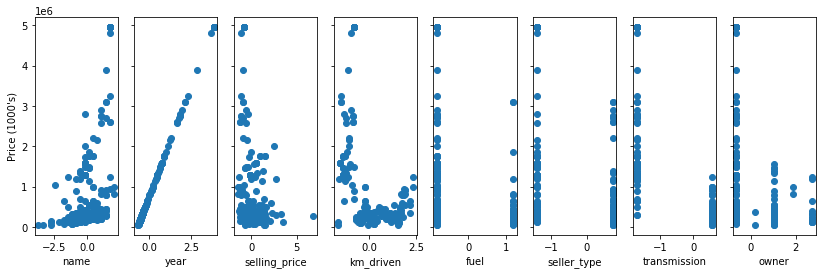

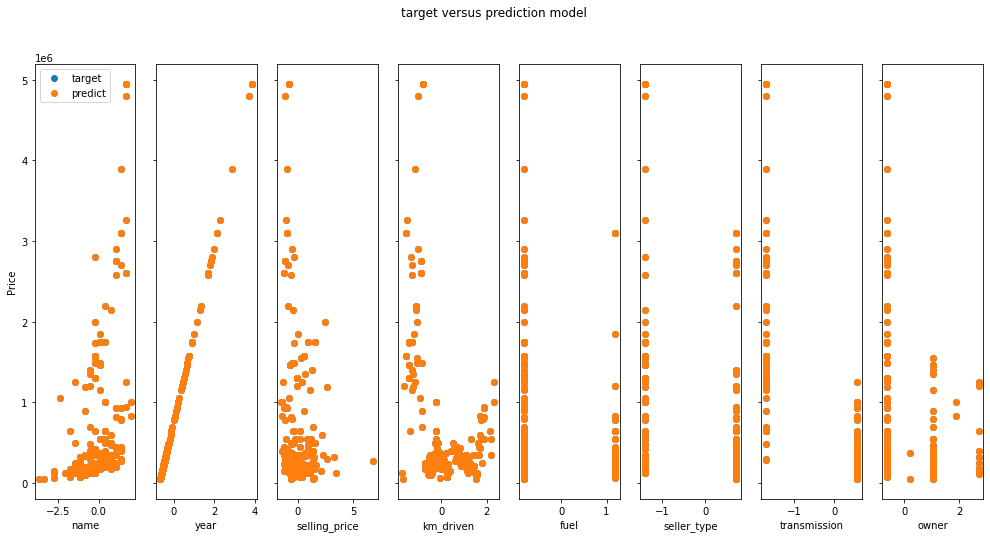

In [426]:
fig,ax=plt.subplots(1, 8, figsize=(14, 4), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(x_train[:,i],y_train)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("Price (1000's)")
# plt.show()
fig,ax=plt.subplots(1,8,figsize=(17,8),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(x_train[:,i],y_train, label = 'target')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(x_train[:,i],lr.predict(x_train), label = 'predict')
ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle("target versus prediction model")

In [427]:
y_pred = lr.predict(x_test)
print(r2_score(y_test, y_pred))
print("MAE: ", (metrics.mean_absolute_error(y_pred, y_test)))
print("MSE: ", (metrics.mean_squared_error(y_pred, y_test)))

print(lr.coef_)
lr.intercept_

0.979549689581899
MAE:  87997.89911832272
MSE:  31869031412.458538
[ 5.12903069e-11  1.08291565e+06 -1.94000012e-10  2.14728630e-11
 -1.46610814e-10 -1.36496325e-10 -1.56867581e-10 -3.29190583e-10]


775182.0333333333

In [435]:
print(f"prediction: {np.dot(x_train[0], w_final) + b_final:0.2f}, target value: {y_train[0]}")

prediction: 250000.00, target value: 250000


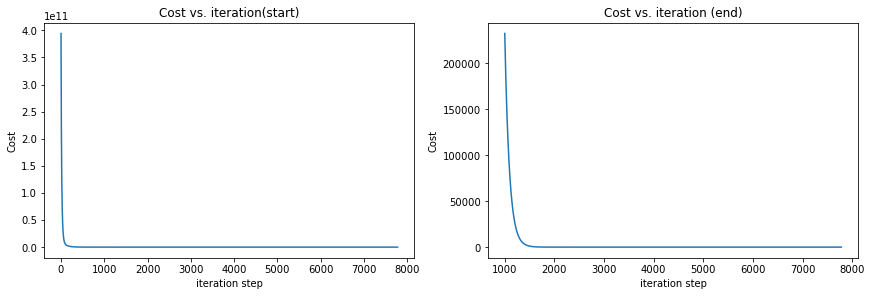

In [437]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist[:777777])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()